**사용한 EDA기법**

<br/>

1. 결측치 처리, 보간
2. 시간 데이터 변환
3. 불쾌지수 + 체감지수 측정
4. 바이닝
5. 스케일링

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# 데이터 로드
train = pd.read_csv(r"C:\Users\USER\OneDrive - 한국외국어대학교\바탕 화면\2023 winter\전력사용량 ai\train.csv")
test = pd.read_csv(r"C:\Users\USER\OneDrive - 한국외국어대학교\바탕 화면\2023 winter\전력사용량 ai\test.csv")
submission = pd.read_csv(r"C:\Users\USER\OneDrive - 한국외국어대학교\바탕 화면\2023 winter\전력사용량 ai\sample_submission.csv")

In [ ]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [ ]:
train['강수량(mm)'].value_counts(dropna=False)

강수량(mm)
NaN     160069
0.0      19101
0.1       2996
0.2       1962
0.3       1431
         ...  
37.2         1
17.4         1
23.4         1
28.5         1
47.5         1
Name: count, Length: 302, dtype: int64

In [ ]:
test

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77
...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(C)          16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 918.9+ KB


In [ ]:
test['강수량(mm)'].value_counts()

강수량(mm)
0.0     14151
0.1       368
0.2       231
0.3       151
0.5       151
        ...  
18.8        1
6.9         1
9.9         1
6.8         1
3.0         1
Name: count, Length: 84, dtype: int64

In [ ]:
submission

,num_date_time,answer
0,1_20220825 00,0
1,1_20220825 01,0
2,1_20220825 02,0
3,1_20220825 03,0
4,1_20220825 04,0
...,...,...
16795,100_20220831 19,0
16796,100_20220831 20,0
16797,100_20220831 21,0
16798,100_20220831 22,0


- 결측치 먼저 처리해주기
- train의 일조,일사는 제거함.

In [ ]:
train = train.drop(['일조(hr)', '일사(MJ/m2)'], axis=1)
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,986.40
...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,640.08


In [ ]:
#강수량 결측치는 그냥 0으로 처리

train['강수량(mm)'] = train['강수량(mm)'].fillna(0)

In [ ]:
#남은 train결측치는 보간해주기
train = train.interpolate(method='linear')

In [ ]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,0.0,0.9,42.0,1085.28
1,1_20220601 01,1,20220601 01,18.0,0.0,1.1,45.0,1047.36
2,1_20220601 02,1,20220601 02,17.7,0.0,1.5,45.0,974.88
3,1_20220601 03,1,20220601 03,16.7,0.0,1.4,48.0,953.76
4,1_20220601 04,1,20220601 04,18.4,0.0,2.8,43.0,986.40
...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,0.0,0.9,86.0,881.04
203996,100_20220824 20,100,20220824 20,22.4,0.0,1.3,86.0,798.96
203997,100_20220824 21,100,20220824 21,21.3,0.0,1.0,92.0,825.12
203998,100_20220824 22,100,20220824 22,21.0,0.0,0.3,94.0,640.08


- 시간당 0.1~ 1.0 mm : 이슬비
- 시간당 1.0 ~ 5.0 mm : 가랑비
- 시간당 5.0 ~ 10.0 mm : 보통비
- 시간당 10.0 ~ 30.0 mm : 굵은비
- 강수량은 4개로 분류, NaN값은 0으로 대체하기로 함

In [ ]:
#강수량 4개로 분류
bins = [-1, 0.0, 0.1, 1.0, 5.0, 10.0]
labels = ['X', '이슬비', '가랑비', '보통비', '굵은비']
train['강수량 구간'] = pd.cut(train['강수량(mm)'], bins=bins, labels=labels)

In [ ]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),강수량 구간
0,1_20220601 00,1,20220601 00,18.6,0.0,0.9,42.0,1085.28,X
1,1_20220601 01,1,20220601 01,18.0,0.0,1.1,45.0,1047.36,X
2,1_20220601 02,1,20220601 02,17.7,0.0,1.5,45.0,974.88,X
3,1_20220601 03,1,20220601 03,16.7,0.0,1.4,48.0,953.76,X
4,1_20220601 04,1,20220601 04,18.4,0.0,2.8,43.0,986.40,X
...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,0.0,0.9,86.0,881.04,X
203996,100_20220824 20,100,20220824 20,22.4,0.0,1.3,86.0,798.96,X
203997,100_20220824 21,100,20220824 21,21.3,0.0,1.0,92.0,825.12,X
203998,100_20220824 22,100,20220824 22,21.0,0.0,0.3,94.0,640.08,X


In [ ]:
train.isnull().sum()

num_date_time       0
건물번호                0
일시                  0
기온(C)               0
강수량(mm)             0
풍속(m/s)             0
습도(%)               0
전력소비량(kWh)          0
강수량 구간           2503
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'; plt.rcParams['axes.unicode_minus'] = False;
import seaborn as sns; #sns.set_style('whitegrid')

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

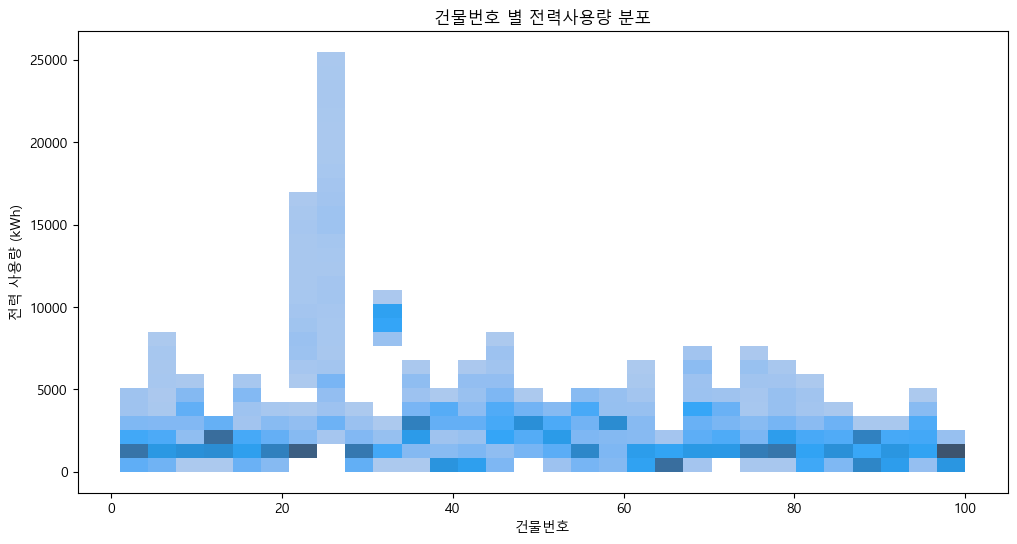

In [ ]:
#히스토그램으로 각 건물번호 당 전력 사용량 보기

plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='건물번호', y='전력소비량(kWh)', bins=30, kde=True)
plt.title('건물번호 별 전력사용량 분포')
plt.xlabel('건물번호')
plt.ylabel('전력 사용량 (kWh)')
plt.show()

- 평균 전력 사용량 10000까지

In [ ]:
train['일시'] = pd.to_datetime(train['일시'], format='%Y%m%d %H')
train['월'] = train['일시'].dt.strftime('%m')
train['일'] = train['일시'].dt.strftime('%d')
train['시간'] = train['일시'].dt.strftime('%H')
train['요일'] = train['일시'].dt.day_name()

C:\Users\USER\AppData\Local\Temp\ipykernel_26968\3050863326.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=train, x='시간', y='전력소비량(kWh)', ci='sd')  # ci='sd'는 표준편차를 표시합니다.


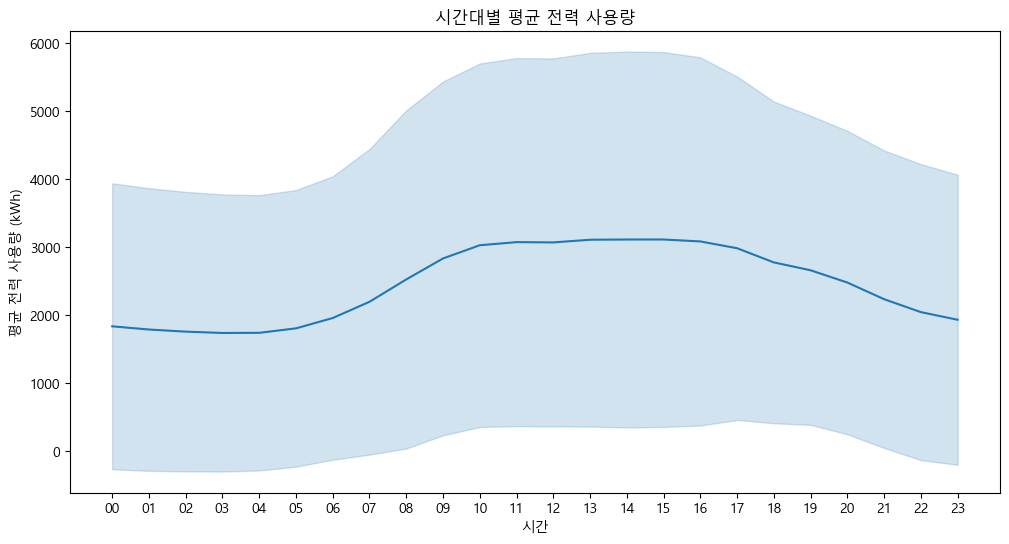

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='시간', y='전력소비량(kWh)', ci='sd')  # ci='sd'는 표준편차를 표시합니다.
plt.title('시간대별 평균 전력 사용량')
plt.xlabel('시간')
plt.ylabel('평균 전력 사용량 (kWh)')
plt.show()

- 낮 시간대의 사용이 가장 많음

In [ ]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),강수량 구간,월,일,시간,요일
0,1_20220601 00,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,1085.28,X,06,01,00,Wednesday
1,1_20220601 01,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,1047.36,X,06,01,01,Wednesday
2,1_20220601 02,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,974.88,X,06,01,02,Wednesday
3,1_20220601 03,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,953.76,X,06,01,03,Wednesday
4,1_20220601 04,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,986.40,X,06,01,04,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,881.04,X,08,24,19,Wednesday
203996,100_20220824 20,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,798.96,X,08,24,20,Wednesday
203997,100_20220824 21,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,825.12,X,08,24,21,Wednesday
203998,100_20220824 22,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,640.08,X,08,24,22,Wednesday


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num_date_time  204000 non-null  object        
 1   건물번호           204000 non-null  int64         
 2   일시             204000 non-null  datetime64[ns]
 3   기온(C)          204000 non-null  float64       
 4   강수량(mm)        204000 non-null  float64       
 5   풍속(m/s)        204000 non-null  float64       
 6   습도(%)          204000 non-null  float64       
 7   전력소비량(kWh)     204000 non-null  float64       
 8   강수량 구간         201497 non-null  category      
 9   월              204000 non-null  object        
 10  일              204000 non-null  object        
 11  시간             204000 non-null  object        
 12  요일             204000 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 18.9+ MB


- 공휴일 날짜 : 2022-06-01 전국동시지방선거, 2022-06-06 현충일, 2022-08-15 광복절(다 train)데이터
- 생각보다 별로 없어서 추출해도 될 듯

In [ ]:
#주말과 공휴일도 만들어 줌
train['주말'] = train['요일'].isin(['Saturday', 'Sunday']).astype(object)
train['공휴일'] = ((train['일시'].dt.date == pd.to_datetime('2022-06-01').date()) |
                 (train['일시'].dt.date == pd.to_datetime('2022-06-06').date()) |
                 (train['일시'].dt.date == pd.to_datetime('2022-08-15').date())).astype(object)

In [ ]:
table = train.pivot_table(values='전력소비량(kWh)', index=['주말', '공휴일'], aggfunc='mean').reset_index()
table

,주말,공휴일,전력소비량(kWh)
0,False,False,2564.408777
1,False,True,2061.108688
2,True,False,2225.794338


- 주말이 아니고, 공휴일이 아닐 때 : 2564.408777
- 주말이 아니고, 공휴일인 경우: 2061
- 주말이고, 공휴일이 아닌 경우: 2225
- 다양한 건물이 모여 있음..

In [ ]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),강수량 구간,월,일,시간,요일,주말,공휴일
0,1_20220601 00,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,1085.28,X,06,01,00,Wednesday,False,True
1,1_20220601 01,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,1047.36,X,06,01,01,Wednesday,False,True
2,1_20220601 02,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,974.88,X,06,01,02,Wednesday,False,True
3,1_20220601 03,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,953.76,X,06,01,03,Wednesday,False,True
4,1_20220601 04,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,986.40,X,06,01,04,Wednesday,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,881.04,X,08,24,19,Wednesday,False,False
203996,100_20220824 20,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,798.96,X,08,24,20,Wednesday,False,False
203997,100_20220824 21,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,825.12,X,08,24,21,Wednesday,False,False
203998,100_20220824 22,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,640.08,X,08,24,22,Wednesday,False,False


In [ ]:
test['일시'] = pd.to_datetime(test['일시'], format='%Y%m%d %H')
test['월'] = test['일시'].dt.strftime('%m')
test['일'] = test['일시'].dt.strftime('%d')
test['시간'] = test['일시'].dt.strftime('%H')
test['요일'] = test['일시'].dt.day_name()
test['주말'] = test['요일'].isin(['Saturday', 'Sunday']).astype(object)

In [ ]:
#불쾌지수, 체감지수 구하기
#구하고 구간화 진행

train['불쾌지수'] = 9/5 * train['기온(C)'] - 0.55 * (1-train['습도(%)']/100) * (9/5 * train['기온(C)'] - 26) + 32
test['불쾌지수'] = 9/5 * test['기온(C)'] - 0.55 * (1-test['습도(%)']/100) * (9/5 * test['기온(C)'] - 26) + 32

train['체감지수'] = 13.12 + 0.6215 * train['기온(C)'] - 11.37 * (train['풍속(m/s)'] ** 0.16) + 0.3965 * (train['풍속(m/s)'] ** 0.16)
test['체감지수'] = 13.12 + 0.6215 * test['기온(C)'] - 11.37 * (test['풍속(m/s)'] ** 0.16) + 0.3965 * (test['풍속(m/s)'] ** 0.16)

In [ ]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),강수량 구간,월,일,시간,요일,주말,공휴일,불쾌지수,체감지수
0,1_20220601 00,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,1085.28,X,06,01,00,Wednesday,False,True,63.09388,13.889837
1,1_20220601 01,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,1047.36,X,06,01,01,Wednesday,False,True,62.46400,13.164876
2,1_20220601 02,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,974.88,X,06,01,02,Wednesday,False,True,62.08735,12.411551
3,1_20220601 03,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,953.76,X,06,01,03,Wednesday,False,True,60.89884,11.918594
4,1_20220601 04,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,986.40,X,06,01,04,Wednesday,False,True,62.88788,11.616906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,881.04,X,08,24,19,Wednesday,False,False,72.38034,16.686587
203996,100_20220824 20,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,798.96,X,08,24,20,Wednesday,False,False,71.21736,15.597646
203997,100_20220824 21,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,825.12,X,08,24,21,Wednesday,False,False,69.79704,15.384450
203998,100_20220824 22,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,640.08,X,08,24,22,Wednesday,False,False,69.41060,17.120750


- 불쾌지수 구별

80이상: 1
75이상 80미만: 2
68이상 75미만: 3
68미만: 4

- 체감지수 구별

37이상: 1
34이상 37미만: 2
31이상 34미만: 3
31미만: 4

In [ ]:
#불쾌지수 1,2,3,4로 구간화

bins_discomfort = [float('-inf'), 68, 75, 80, float('inf')]
labels_discomfort = [4, 3, 2, 1]
train['불쾌지수_구간'] = pd.cut(train['불쾌지수'], bins=bins_discomfort, labels=labels_discomfort)
test['불쾌지수_구간'] = pd.cut(test['불쾌지수'], bins=bins_discomfort, labels=labels_discomfort)

In [ ]:
#체감지수 1,2,3,4로 구간화

bins_discomfort = [float('-inf'), 31, 34, 37, float('inf')]
labels_discomfort = [4, 3, 2, 1]
train['체감지수_구간'] = pd.cut(train['체감지수'], bins=bins_discomfort, labels=labels_discomfort)
test['체감지수_구간'] = pd.cut(test['체감지수'], bins=bins_discomfort, labels=labels_discomfort)

In [ ]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),강수량 구간,월,일,시간,요일,주말,공휴일,불쾌지수,체감지수,불쾌지수_구간,체감지수_구간
0,1_20220601 00,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,1085.28,X,06,01,00,Wednesday,False,True,63.09388,13.889837,4,4
1,1_20220601 01,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,1047.36,X,06,01,01,Wednesday,False,True,62.46400,13.164876,4,4
2,1_20220601 02,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,974.88,X,06,01,02,Wednesday,False,True,62.08735,12.411551,4,4
3,1_20220601 03,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,953.76,X,06,01,03,Wednesday,False,True,60.89884,11.918594,4,4
4,1_20220601 04,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,986.40,X,06,01,04,Wednesday,False,True,62.88788,11.616906,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,881.04,X,08,24,19,Wednesday,False,False,72.38034,16.686587,3,4
203996,100_20220824 20,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,798.96,X,08,24,20,Wednesday,False,False,71.21736,15.597646,3,4
203997,100_20220824 21,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,825.12,X,08,24,21,Wednesday,False,False,69.79704,15.384450,3,4
203998,100_20220824 22,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,640.08,X,08,24,22,Wednesday,False,False,69.41060,17.120750,3,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num_date_time  204000 non-null  object        
 1   건물번호           204000 non-null  int64         
 2   일시             204000 non-null  datetime64[ns]
 3   기온(C)          204000 non-null  float64       
 4   강수량(mm)        204000 non-null  float64       
 5   풍속(m/s)        204000 non-null  float64       
 6   습도(%)          204000 non-null  float64       
 7   전력소비량(kWh)     204000 non-null  float64       
 8   강수량 구간         201497 non-null  category      
 9   월              204000 non-null  object        
 10  일              204000 non-null  object        
 11  시간             204000 non-null  object        
 12  요일             204000 non-null  object        
 13  주말             204000 non-null  object        
 14  공휴일            204000 non-null  object        
 15  

In [ ]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),강수량 구간,월,일,시간,요일,주말,공휴일,불쾌지수,체감지수,불쾌지수_구간,체감지수_구간
0,1_20220601 00,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,1085.28,X,06,01,00,Wednesday,False,True,63.09388,13.889837,4,4
1,1_20220601 01,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,1047.36,X,06,01,01,Wednesday,False,True,62.46400,13.164876,4,4
2,1_20220601 02,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,974.88,X,06,01,02,Wednesday,False,True,62.08735,12.411551,4,4
3,1_20220601 03,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,953.76,X,06,01,03,Wednesday,False,True,60.89884,11.918594,4,4
4,1_20220601 04,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,986.40,X,06,01,04,Wednesday,False,True,62.88788,11.616906,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,881.04,X,08,24,19,Wednesday,False,False,72.38034,16.686587,3,4
203996,100_20220824 20,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,798.96,X,08,24,20,Wednesday,False,False,71.21736,15.597646,3,4
203997,100_20220824 21,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,825.12,X,08,24,21,Wednesday,False,False,69.79704,15.384450,3,4
203998,100_20220824 22,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,640.08,X,08,24,22,Wednesday,False,False,69.41060,17.120750,3,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num_date_time  204000 non-null  object        
 1   건물번호           204000 non-null  int64         
 2   일시             204000 non-null  datetime64[ns]
 3   기온(C)          204000 non-null  float64       
 4   강수량(mm)        204000 non-null  float64       
 5   풍속(m/s)        204000 non-null  float64       
 6   습도(%)          204000 non-null  float64       
 7   전력소비량(kWh)     204000 non-null  float64       
 8   강수량 구간         201497 non-null  category      
 9   월              204000 non-null  object        
 10  일              204000 non-null  object        
 11  시간             204000 non-null  object        
 12  요일             204000 non-null  object        
 13  주말             204000 non-null  object        
 14  공휴일            204000 non-null  object        
 15  

- 결측치, 바이닝 완료

- 원핫인코딩

In [ ]:
# 월, 일, 시간 컬럼을 datetime 형식으로 변환하지 않고 그대로 사용
categorical_columns = ['월', '일', '시간', '요일', '주말', '공휴일']

# 범주형 변수 원-핫 인코딩
encoded_data = pd.get_dummies(train, columns=categorical_columns)

- 정규화
<br/>
- Min-Max Scaler활용
: 데이터가 균등한 분포를 가진 경우, 이상치(outlier)가 적은 경우 둘 다 해당한다고 생각

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '전력소비량(kWh)', '불쾌지수', '체감지수']
scaler = MinMaxScaler()
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])
print(train.head())

   num_date_time  건물번호                  일시     기온(C)  강수량(mm)   풍속(m/s)  \
0  1_20220601 00     1 2022-06-01 00:00:00  0.314815      0.0  0.067669   
1  1_20220601 01     1 2022-06-01 01:00:00  0.292593      0.0  0.082707   
2  1_20220601 02     1 2022-06-01 02:00:00  0.281481      0.0  0.112782   
3  1_20220601 03     1 2022-06-01 03:00:00  0.244444      0.0  0.105263   
4  1_20220601 04     1 2022-06-01 04:00:00  0.307407      0.0  0.210526   

      습도(%)  전력소비량(kWh) 강수량 구간   월   일  시간         요일     주말   공휴일      불쾌지수  \
0  0.333333    0.042579      X  06  01  00  Wednesday  False  True  0.338066   
1  0.367816    0.041092      X  06  01  01  Wednesday  False  True  0.321183   
2  0.367816    0.038248      X  06  01  02  Wednesday  False  True  0.311088   
3  0.402299    0.037419      X  06  01  03  Wednesday  False  True  0.279232   
4  0.344828    0.038700      X  06  01  04  Wednesday  False  True  0.332545   

       체감지수 불쾌지수_구간 체감지수_구간  
0  0.279810       4       4  
1  0.249

- Min-Max Scaling을 통해 각 열을 0과 1 사이의 범위로 변환
1. 기온, 강수량, 풍속, 습도 등 모든 특성이 동일한 척도로 표현

<br/>

2. Categorical 변수:
- '강수량 구간', '월', '일', '시간', '요일', '주말', '공휴일', '불쾌지수_구간', '체감지수_구간'과 같은 범주형 변수들은 원래의 문자열 또는 날짜 형식에서 수치적으로 변환

<br/>

3. 전력소비량(kWh): 전력소비량 역시 정규화되었으며, 이 값은 해당 시점에서의 전체 데이터셋에서의 상대적 위치를 나타냄

<br/>

4. 불쾌지수와 체감지수: 불쾌지수와 체감지수도 정규화되었으며, 해당 값은 각각 0과 1 사이의 범위로 변환

In [ ]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),강수량 구간,월,일,시간,요일,주말,공휴일,불쾌지수,체감지수,불쾌지수_구간,체감지수_구간
0,1_20220601 00,1,2022-06-01 00:00:00,0.314815,0.0,0.067669,0.333333,0.042579,X,06,01,00,Wednesday,False,True,0.338066,0.279810,4,4
1,1_20220601 01,1,2022-06-01 01:00:00,0.292593,0.0,0.082707,0.367816,0.041092,X,06,01,01,Wednesday,False,True,0.321183,0.249658,4,4
2,1_20220601 02,1,2022-06-01 02:00:00,0.281481,0.0,0.112782,0.367816,0.038248,X,06,01,02,Wednesday,False,True,0.311088,0.218326,4,4
3,1_20220601 03,1,2022-06-01 03:00:00,0.244444,0.0,0.105263,0.402299,0.037419,X,06,01,03,Wednesday,False,True,0.279232,0.197823,4,4
4,1_20220601 04,1,2022-06-01 04:00:00,0.307407,0.0,0.210526,0.344828,0.038700,X,06,01,04,Wednesday,False,True,0.332545,0.185275,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,2022-08-24 19:00:00,0.481481,0.0,0.067669,0.839080,0.034566,X,08,24,19,Wednesday,False,False,0.586975,0.396131,3,4
203996,100_20220824 20,100,2022-08-24 20:00:00,0.455556,0.0,0.097744,0.839080,0.031346,X,08,24,20,Wednesday,False,False,0.555803,0.350840,3,4
203997,100_20220824 21,100,2022-08-24 21:00:00,0.414815,0.0,0.075188,0.908046,0.032372,X,08,24,21,Wednesday,False,False,0.517733,0.341973,3,4
203998,100_20220824 22,100,2022-08-24 22:00:00,0.403704,0.0,0.022556,0.931034,0.025113,X,08,24,22,Wednesday,False,False,0.507375,0.414188,3,4


**아쉬운 점**

<br/>

1. 시간 처리 미숙

<br/>

2. 원핫인코딩을 사용해야 하는지?

<br/>

3. 로그변환을 사용하는 게 좋을지?

<br/>

2. K-means기법을 사용하는 게 좋을지?(PCA는 안될 듯)

In [ ]:
test

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),월,일,시간,요일,주말,불쾌지수,체감지수,불쾌지수_구간,체감지수_구간
0,1_20220825 00,1,2022-08-25 00:00:00,23.5,0.0,2.2,72,08,25,00,Thursday,False,71.78980,15.276298,3,4
1,1_20220825 01,1,2022-08-25 01:00:00,23.0,0.0,0.9,72,08,25,01,Thursday,False,71.02840,16.624437,3,4
2,1_20220825 02,1,2022-08-25 02:00:00,22.7,0.0,1.5,75,08,25,02,Thursday,False,70.81675,15.519051,3,4
3,1_20220825 03,1,2022-08-25 03:00:00,22.1,0.0,1.3,78,08,25,03,Thursday,False,70.11262,15.411196,3,4
4,1_20220825 04,1,2022-08-25 04:00:00,21.8,0.0,1.0,77,08,25,04,Thursday,False,69.56514,15.695200,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100_20220831 19,100,2022-08-31 19:00:00,22.5,0.0,0.9,84,08,31,19,Wednesday,False,71.22400,16.313687,3,4
16796,100_20220831 20,100,2022-08-31 20:00:00,20.7,0.0,0.4,95,08,31,20,Wednesday,False,68.95035,16.507965,3,4
16797,100_20220831 21,100,2022-08-31 21:00:00,20.2,0.0,0.4,98,08,31,21,Wednesday,False,68.24604,16.197215,3,4
16798,100_20220831 22,100,2022-08-31 22:00:00,20.1,0.0,1.1,97,08,31,22,Wednesday,False,68.01203,14.470026,3,4


**XGBOOST**

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X_train = train.drop(['num_date_time', '일시', '전력소비량(kWh)'], axis=1)
#많은 바이닝을 했기 때문에 일단 drop하기로 함..
#전력 소비량 타킷으로 잡음
y_train = train['전력소비량(kWh)']
X_test = test.drop(['num_date_time', '일시'], axis=1)

In [ ]:
#원핫 인코딩 사용함(카테고리 정리한 것 같은데 정리가 안 됐음)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
#열 순서, 이름 동일하게 만듦
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

In [ ]:
# Train 데이터를 학습용과 검증용으로 나눔
#그냥 다 보통으로 나눔
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# XGBoost 사용 회귀라 XGBRegressor()사용했음
model = XGBRegressor()
model.fit(X_train_split, y_train_split)

In [ ]:
#mse로 모델 평가함(집값 예측이 아니기 때문에 굳이 rmse를 사용할 필요가 없다 판단함)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("검증 데이터 MSE:", mse)

In [ ]:
# Test 데이터 예측
test_predictions = model.predict(X_test)


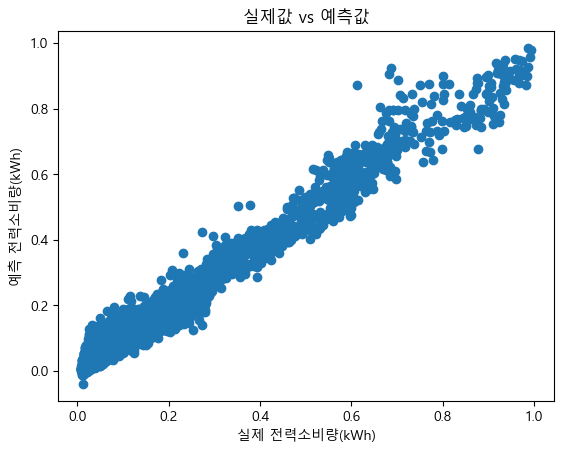

In [ ]:
import matplotlib.pyplot as plt

# 실제값과 예측값 비교해봄..
plt.scatter(y_val, y_pred)
plt.xlabel("실제 전력소비량(kWh)")
plt.ylabel("예측 전력소비량(kWh)")
plt.title("실제값 vs 예측값")
plt.show()
